In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [33]:
## Load dataset
complete_df = pd.read_csv("complete_data.csv",index_col=0)

In [34]:
complete_df

,business_id,popularity,stars,vadar_compound,fsq_id,name,review_count,features,outdoor_seating,true_count,...,drive_through,breakfast,cocktails,accepts_nfc,lunch,public_lot,atm,restroom,reservations,private_lot
0,MTSW4McQd7CbVtyjqoe9mw,0.926645,4.057471,0.695723,4ad36cf4f964a52055e420e3,St Honore Pastries,80,{'payment': {'credit_cards': {'accepts_credit_...,False,0,...,False,False,False,False,False,False,False,False,False,False
1,CF33F8-E6oudUQ46HnavjQ,0.992263,2.166667,-0.131100,4c5daee96147be9a44c19209,Sonic Drive-In,6,{'payment': {'credit_cards': {'accepts_credit_...,True,2,...,False,False,False,False,False,False,False,False,False,False
2,bBDDEgkFA1Otx9Lfe7BZUQ,0.995453,1.700000,0.406790,4b0d78d9f964a5200d4923e3,Sonic Drive-In,10,{'payment': {'credit_cards': {'accepts_credit_...,True,4,...,False,False,False,False,True,False,False,False,False,False
3,il_Ro8jwPlHresjw9EGmBg,0.985955,2.413793,0.170748,4b8c644ff964a52074ce32e3,Denny's,28,{'payment': {'credit_cards': {'accepts_credit_...,False,2,...,False,True,False,False,True,False,False,False,False,False
4,0bPLkL0QhhPO5kt1_EXmNQ,0.963966,4.386792,0.762607,4dc1e77052b1c1fb37dd833f,Zio's Italian Market,100,{'services': {'dine_in': {'reservations': True...,False,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,wpHrK6z6eNwG0k9Ke5q8sQ,0.898604,4.800000,0.860020,518c45e6498edfc9a39509d6,Beef Master Meat Market,10,{},False,0,...,False,False,False,False,False,False,False,False,False,False
11370,5-pMvc-wCl1kT7bN4-bFyw,0.963282,2.944444,0.587025,4af4eb73f964a52074f721e3,Thurman Grill,35,{'payment': {'credit_cards': {'accepts_credit_...,True,3,...,False,False,False,False,False,False,False,False,False,False
11371,5pLVCtrVQiGzMsTVWaf-3Q,0.999749,4.482759,0.789441,4c015296f7ab0f474be215b6,A & S Pizza & Pasta,28,{'payment': {'credit_cards': {'accepts_credit_...,False,2,...,False,True,False,False,True,False,False,False,False,False
11372,r6urzh91dq72mEREmoE-1g,0.911576,4.282051,0.791208,4b6c720cf964a520b73a2ce3,Hatville Deli,76,{'payment': {'credit_cards': {'accepts_credit_...,True,2,...,False,False,False,False,True,False,False,False,False,False


In [35]:
## Filter response varibale which is bigger than 0.8
# idx = 0
# remove_list = []
# for i in complete_df.popularity:
#     if i < 0.8:
#         remove_list.append(idx)
#     idx += 1
# complete_df.drop(remove_list, axis=0, inplace=True)

In [36]:
## Perform Math Log conversion on response variable
complete_df['popularity'] = complete_df['popularity'].apply(lambda x: int(math.ceil(math.log(x/(1-x)))))

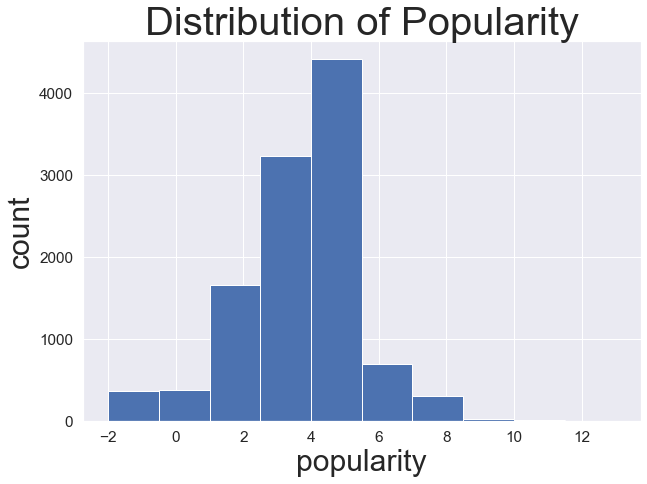

In [37]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(complete_df.popularity)
 
# Show plot
plt.title("Distribution of Popularity",fontsize=40)
plt.xlabel("popularity",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.show()

In [38]:
# Cut Popularity into Different Categories
#complete_df['popularity'] = pd.cut(complete_df['popularity'],5)
complete_df['popularity'] = pd.cut(complete_df['popularity'],5,labels=['1','2','3','4','5'])

In [39]:
complete_df['popularity'].value_counts()

2    7301
3    2537
1    1150
4     101
5       6
Name: popularity, dtype: int64

In [40]:
complete_df.popularity.describe()

count     11095
unique        5
top           2
freq       7301
Name: popularity, dtype: object

In [41]:
cate = pd.cut(complete_df.stars,bins = [-1,0.5,1.5,2.5,3.5,4.5,6],labels = [0,1,2,3,4,5])
complete_df.insert(2,'star',cate)

In [42]:
cate = pd.cut(complete_df.vadar_compound,bins = [-2,-0.99,0.01,2],labels = [0,1,2])
complete_df.insert(4,'attitude',cate)

In [43]:
cate = pd.cut(complete_df.review_count,bins = [-1,15,38,101,100000],labels = [0,1,2,3])
complete_df.insert(8,'review_count_group',cate)

In [44]:
complete_df

,business_id,popularity,star,stars,attitude,vadar_compound,fsq_id,name,review_count_group,review_count,...,drive_through,breakfast,cocktails,accepts_nfc,lunch,public_lot,atm,restroom,reservations,private_lot
0,MTSW4McQd7CbVtyjqoe9mw,2,4,4.057471,2,0.695723,4ad36cf4f964a52055e420e3,St Honore Pastries,2,80,...,False,False,False,False,False,False,False,False,False,False
1,CF33F8-E6oudUQ46HnavjQ,3,2,2.166667,1,-0.131100,4c5daee96147be9a44c19209,Sonic Drive-In,0,6,...,False,False,False,False,False,False,False,False,False,False
2,bBDDEgkFA1Otx9Lfe7BZUQ,3,2,1.700000,2,0.406790,4b0d78d9f964a5200d4923e3,Sonic Drive-In,0,10,...,False,False,False,False,True,False,False,False,False,False
3,il_Ro8jwPlHresjw9EGmBg,3,2,2.413793,2,0.170748,4b8c644ff964a52074ce32e3,Denny's,1,28,...,False,True,False,False,True,False,False,False,False,False
4,0bPLkL0QhhPO5kt1_EXmNQ,2,4,4.386792,2,0.762607,4dc1e77052b1c1fb37dd833f,Zio's Italian Market,2,100,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,wpHrK6z6eNwG0k9Ke5q8sQ,2,5,4.800000,2,0.860020,518c45e6498edfc9a39509d6,Beef Master Meat Market,0,10,...,False,False,False,False,False,False,False,False,False,False
11370,5-pMvc-wCl1kT7bN4-bFyw,2,3,2.944444,2,0.587025,4af4eb73f964a52074f721e3,Thurman Grill,1,35,...,False,False,False,False,False,False,False,False,False,False
11371,5pLVCtrVQiGzMsTVWaf-3Q,4,4,4.482759,2,0.789441,4c015296f7ab0f474be215b6,A & S Pizza & Pasta,1,28,...,False,True,False,False,True,False,False,False,False,False
11372,r6urzh91dq72mEREmoE-1g,2,4,4.282051,2,0.791208,4b6c720cf964a520b73a2ce3,Hatville Deli,2,76,...,False,False,False,False,True,False,False,False,False,False


In [45]:
Y = complete_df['popularity']
X = complete_df.drop(['popularity',"business_id",'fsq_id','name','features','true_count','stars','vadar_compound','review_count'], axis = 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=0)
X_train.shape, X_test.shape

((9985, 38), (1110, 38))

In [47]:
rf = RandomForestClassifier(random_state=42,n_estimators=100)

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
predictions = rf.predict(X_test)

In [50]:
print('R^2: %.5f ' % (rf.score(X_test, np.array(y_test), sample_weight=None)))

R^2: 0.68919 


In [51]:
# View accuracy score
accuracy_score(y_test, predictions)

0.6891891891891891

In [52]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, predictions)

array([[  1, 101,   3,   0,   0],
       [  6, 678,  54,   1,   0],
       [  3, 164,  86,   2,   0],
       [  0,   9,   1,   0,   0],
       [  0,   1,   0,   0,   0]])

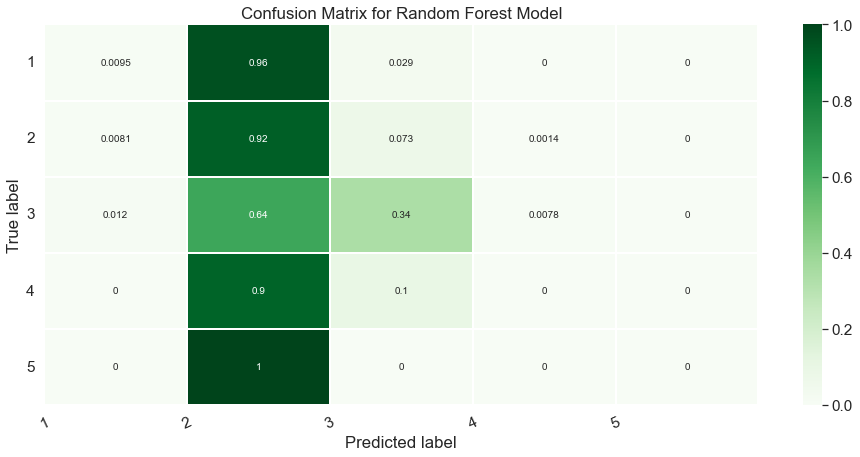

In [53]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2', '3', 
               '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [54]:
# View the classification report for test data and predictions
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.10      0.01      0.02       105
           2       0.71      0.92      0.80       739
           3       0.60      0.34      0.43       255
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1

    accuracy                           0.69      1110
   macro avg       0.28      0.25      0.25      1110
weighted avg       0.62      0.69      0.63      1110



/Users/kivenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kivenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kivenlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
